In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df = pd.read_csv("data/flights.csv")

/Users/sushilkhairnar/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [4]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [6]:
df_airports = pd.read_csv("data/airports.csv")

In [7]:
df_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [8]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [9]:
df_airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [10]:
df_airports = df_airports.dropna(subset = ['LATITUDE','LONGITUDE'])
df_airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [11]:
print(f"Number of airports: {len(df['ORIGIN_AIRPORT'].unique())}")

Number of airports: 930


In [12]:
df_airlines = pd.read_csv('data/airlines.csv')

In [13]:
df_airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [14]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


In [15]:
%%html
<div class='tableauPlaceholder' id='viz1569936847474' style='position: relative'><noscript><a href='#'><img alt=' ' 
src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;9B&#47;9BD44NRJ9&#47;1_rss.png' style='border: none'
/></a></noscript><object class='tableauViz'  
style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' 
/> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;9BD44NRJ9' 
/> <param name='toolbar' value='yes' 
/><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;9B&#47;9BD44NRJ9&#47;1.png' 
/> <param name='animate_transition' value='yes'
/><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' 
/><param name='display_overlay' value='yes' /><param name='display_count' value='yes' 
/><param name='filter' value='publish=yes' /></object></div>                
<script type='text/javascript'>                    
var divElement = document.getElementById('viz1569936847474');                    
var vizElement = divElement.getElementsByTagName('object')[0];                    
vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);               
</script>

[Text(0.5, 0, 'TAXI_TIME (TAXI_OUT: green, TAXI_IN: blue)')]

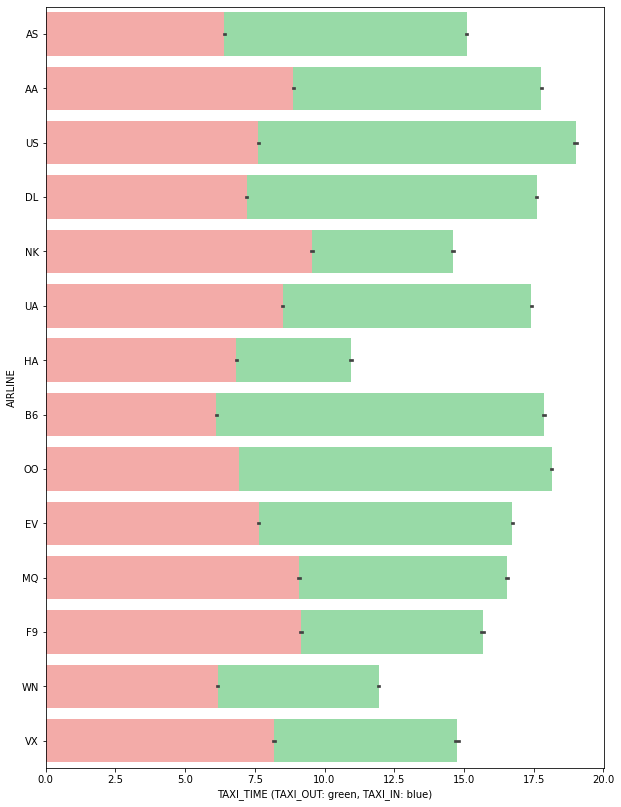

In [16]:
# Plot to show the Taxi In and Taxi Out Time
axis = plt.subplots(figsize=(10,14))
sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
axis = sns.barplot(x="TAXI_OUT", y="AIRLINE", data=df, color="g")
axis = sns.barplot(x="TAXI_IN", y="AIRLINE", data=df, color="r")
axis.set(xlabel="TAXI_TIME (TAXI_OUT: green, TAXI_IN: blue)")

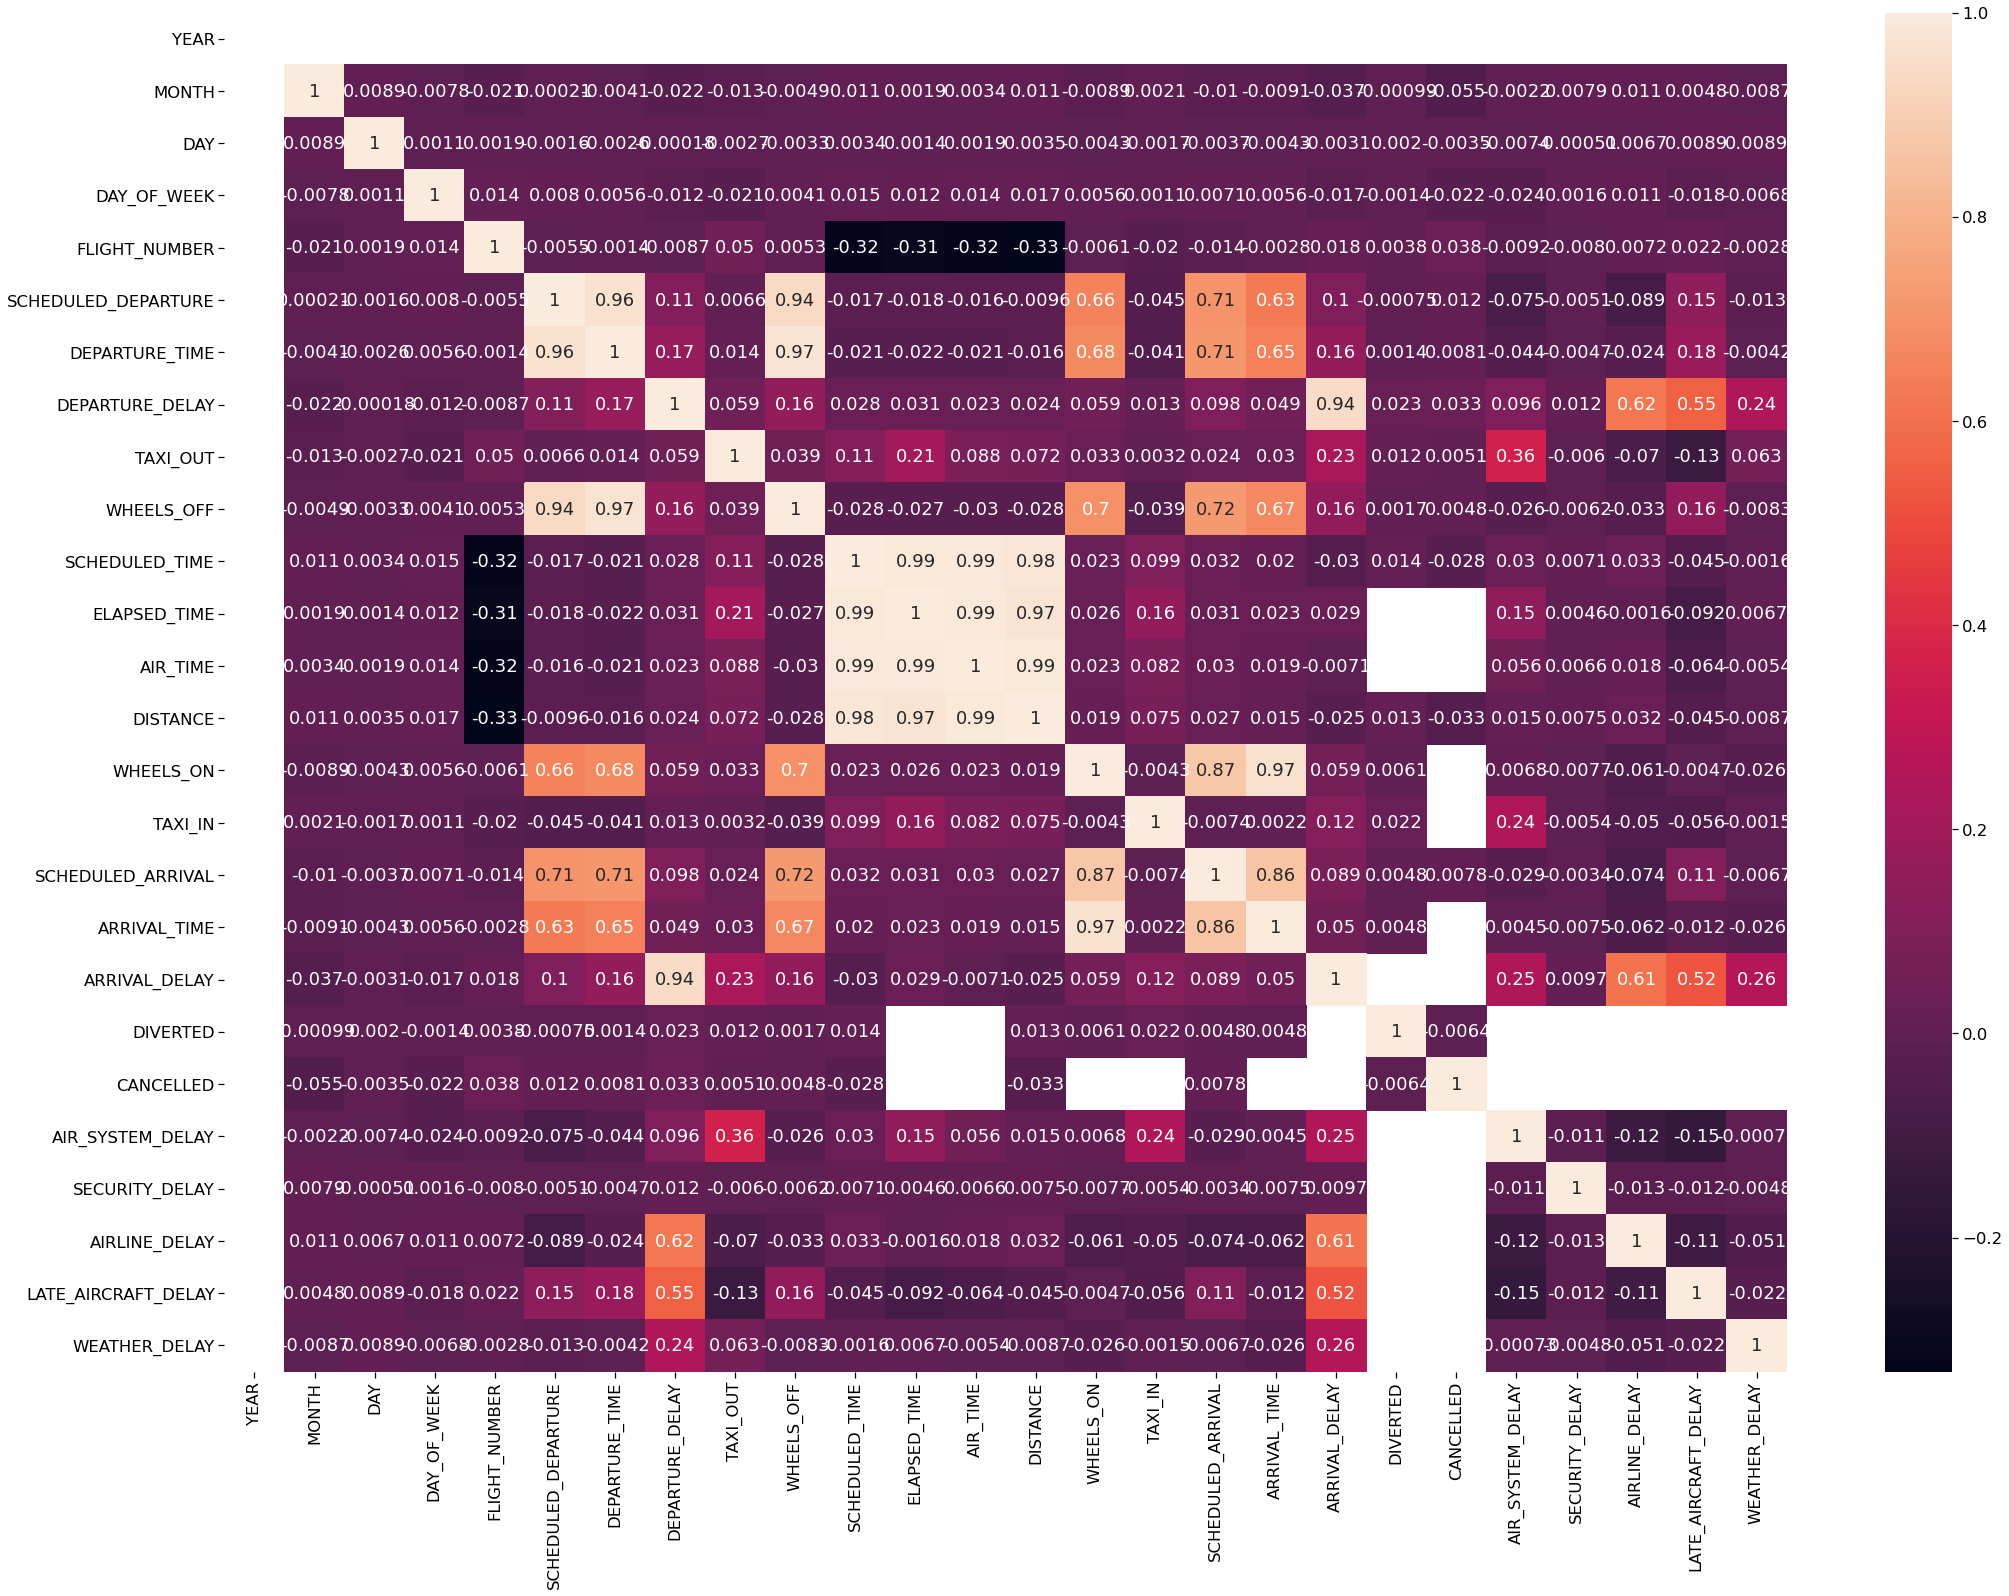

In [17]:
axis = plt.subplots(figsize=(35,25))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [18]:
%%html
<div class='tableauPlaceholder' id='viz1569938215526' style='position: relative'><noscript><a href='#'><img alt=' ' 
src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;PH&#47;PHNKQPSZG&#47;1_rss.png' style='border: none'
/></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' 
/> <param name='embed_code_version' value='3' 
/> <param name='path' value='shared&#47;PHNKQPSZG' 
/> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;PH&#47;PHNKQPSZG&#47;1.png' 
/> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes'
/><param name='display_overlay' value='yes' 
/><param name='display_count' value='yes' /></object></div>                
<script type='text/javascript'>                   
var divElement = document.getElementById('viz1569938215526');                   
var vizElement = divElement.getElementsByTagName('object')[0];                   
vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                   
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                   
vizElement.parentNode.insertBefore(scriptElement, vizElement);               
</script>


/Users/sushilkhairnar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


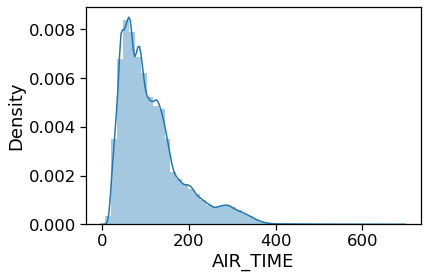

In [19]:
# To check the Distribution of Air Time
sns.distplot(df['AIR_TIME'])
plt.show()

/Users/sushilkhairnar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


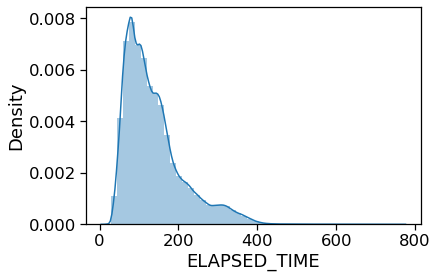

In [20]:
# To check the Distribution of Elapsed Time
sns.distplot(df['ELAPSED_TIME'])
plt.show()

/Users/sushilkhairnar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


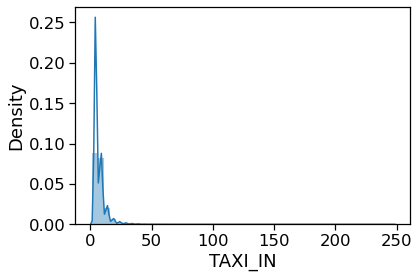

In [21]:
# To check the Distribution of Taxi IN
sns.distplot(df['TAXI_IN'])
plt.show()

/Users/sushilkhairnar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


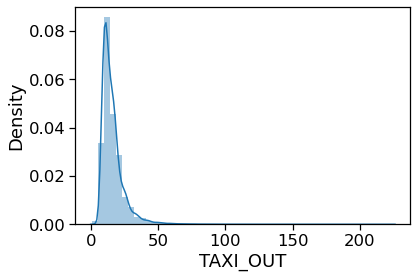

In [22]:
# To check the Distribution of Taxi OUT
sns.distplot(df['TAXI_OUT'])
plt.show()

In [23]:
# filtering out unnecessary columns
df1=df.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',\
             'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME','AIR_TIME',\
             'WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'], axis=1)

In [24]:
df1.head()

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN


In [25]:
# Handling missing values: replacing all NaN values with the mean of the attribute 
df1=df1.fillna(df1.mean())

In [26]:
#df1 = df1.dropna()

In [27]:
df1.head()

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,13.480568,0.076154,18.969547,23.472838,2.91529
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0,0,13.480568,0.076154,18.969547,23.472838,2.91529
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0,0,13.480568,0.076154,18.969547,23.472838,2.91529
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0,0,13.480568,0.076154,18.969547,23.472838,2.91529
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,13.480568,0.076154,18.969547,23.472838,2.91529


In [28]:
# creating a new column; it will tell if the flight was delayed or not
res=[]
for delay in df1['ARRIVAL_DELAY']:
    if delay > 15:
        res.append(1)
    else:
        res.append(0) 
df1['result'] = res

In [29]:
df1.value_counts('result')

result
0    4795581
1    1023498
dtype: int64

In [30]:
# removing some more columns
df2=df1.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
df2

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,5,-11.0,430,0,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
1,1,1,10,-8.0,750,0,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
2,1,1,20,-2.0,806,0,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
3,1,1,20,-5.0,805,0,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
4,1,1,25,-1.0,320,0,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,12,31,2359,-4.0,819,0,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
5819075,12,31,2359,-4.0,446,0,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
5819076,12,31,2359,-9.0,440,0,0,13.480568,0.076154,18.969547,23.472838,2.91529,0
5819077,12,31,2359,-6.0,340,0,0,13.480568,0.076154,18.969547,23.472838,2.91529,0


### Splitting Data for Training and Testing

In [31]:
data = df2.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)  # splitting in the ratio 70:30

### Scaling

In [32]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

### Defining various Regressors

In [33]:
LinR = LinearRegression()
Rfc = RandomForestRegressor(random_state=2)
Dtc = DecisionTreeRegressor(random_state = 2)

In [34]:
le = LabelEncoder()

### Model fitting and Metrics

In [36]:
for model, name in zip([LinR,Dtc,Rfc], ['Linear Regression','Decision Tree Regressor','Random forest Regressor',]):
    modd = model.fit(X_train_sc,y_train)
    Y_predict=modd.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print("\n")

Linear Regression
Mean Absolute Error: 0.10321349563303124
Mean Squared Error: 0.03216588463814112
Root Mean Squared Error: 0.17934850051823997
R2 :  0.7781556510572647


Decision Tree Regressor
Mean Absolute Error: 0.000162683219111383
Mean Squared Error: 0.000162683219111383
Root Mean Squared Error: 0.012754733204241593
R2 :  0.9988779928413696


Random forest Regressor
Mean Absolute Error: 0.00022598646750574553
Mean Squared Error: 9.193509397820042e-05
Root Mean Squared Error: 0.009588278989380755
R2 :  0.9993659343960838




#### 